In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Veri Yükleme İşlemi**

In [2]:
import pandas as pd
import zipfile
import os

# Paths for the uploaded files
csv_path = '/content/drive/MyDrive/Classes.csv'
#zip_path = '/content/drive/MyDrive/GTSRB.zip'
extracted_path = '/content/drive/MyDrive/GTSRBDT'

# Load the CSV file
classes_df = pd.read_csv(csv_path)

# Extract the ZIP file
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(extracted_path)

# Display information about the extracted files and the CSV file
extracted_files = os.listdir(extracted_path)
classes_df.head(), extracted_files

(   ClassId              SignName
 0        0  Speed limit (20km/h)
 1        1  Speed limit (30km/h)
 2        2  Speed limit (50km/h)
 3        3  Speed limit (60km/h)
 4        4  Speed limit (70km/h),
 ['5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '0',
  '1',
  '2',
  '3',
  '4',
  'train',
  'test'])

In [3]:
import os

# Klasörlerin bulunduğu ana dizin
data_dir = '/content/drive/MyDrive/GTSRBDT'  # Veri setinizin bulunduğu yol

# Kategoriler ve veri sayıları
categories = os.listdir(data_dir)
category_counts = {}

for category in categories:
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        num_files = len(os.listdir(category_path))
        category_counts[category] = num_files

# Sınıflar ve veri sayıları yazdırılır
for category, count in category_counts.items():
    print(f"Kategori: {category}, Veri Sayısı: {count}")

# Toplam veri sayısını yazdır
total_files = sum(category_counts.values())
print(f"\nToplam Veri Sayısı: {total_files}")


Kategori: 5, Veri Sayısı: 1860
Kategori: 6, Veri Sayısı: 420
Kategori: 7, Veri Sayısı: 1440
Kategori: 8, Veri Sayısı: 1410
Kategori: 9, Veri Sayısı: 1470
Kategori: 10, Veri Sayısı: 2010
Kategori: 11, Veri Sayısı: 1320
Kategori: 12, Veri Sayısı: 2100
Kategori: 13, Veri Sayısı: 2160
Kategori: 14, Veri Sayısı: 780
Kategori: 15, Veri Sayısı: 630
Kategori: 16, Veri Sayısı: 420
Kategori: 17, Veri Sayısı: 1110
Kategori: 18, Veri Sayısı: 1200
Kategori: 19, Veri Sayısı: 210
Kategori: 20, Veri Sayısı: 360
Kategori: 21, Veri Sayısı: 330
Kategori: 22, Veri Sayısı: 390
Kategori: 23, Veri Sayısı: 510
Kategori: 24, Veri Sayısı: 270
Kategori: 25, Veri Sayısı: 1500
Kategori: 26, Veri Sayısı: 600
Kategori: 27, Veri Sayısı: 240
Kategori: 28, Veri Sayısı: 540
Kategori: 29, Veri Sayısı: 270
Kategori: 30, Veri Sayısı: 450
Kategori: 31, Veri Sayısı: 780
Kategori: 32, Veri Sayısı: 240
Kategori: 33, Veri Sayısı: 689
Kategori: 34, Veri Sayısı: 420
Kategori: 35, Veri Sayısı: 1200
Kategori: 36, Veri Sayısı: 390
K

**Veri Eşitleme ve Eksik Veri Kontrolü İşlemleri**

In [4]:
# Extract all folder names from the extracted path
extracted_folders = set(os.listdir(extracted_path))

# Extract ClassIds from the CSV file
csv_classes = set(classes_df['ClassId'].astype(str))

# Check for missing or extra folders
missing_folders = csv_classes - extracted_folders
extra_folders = extracted_folders - csv_classes

missing_folders, extra_folders

(set(), {'test', 'train'})

In [5]:
# List categories (class IDs) and their corresponding names from the Classes.csv file
categories = classes_df[['ClassId', 'SignName']].values

# Display categories as a list of tuples (ClassId, SignName)
categories_list = [(row[0], row[1]) for row in categories]
categories_list[:43]  # Display the categories for brevity

[(0, 'Speed limit (20km/h)'),
 (1, 'Speed limit (30km/h)'),
 (2, 'Speed limit (50km/h)'),
 (3, 'Speed limit (60km/h)'),
 (4, 'Speed limit (70km/h)'),
 (5, 'Speed limit (80km/h)'),
 (6, 'End of speed limit (80km/h)'),
 (7, 'Speed limit (100km/h)'),
 (8, 'Speed limit (120km/h)'),
 (9, 'No passing'),
 (10, 'No passing for vechiles over 3.5 metric tons'),
 (11, 'Right-of-way at the next intersection'),
 (12, 'Priority road'),
 (13, 'Yield'),
 (14, 'Stop'),
 (15, 'No vechiles'),
 (16, 'Vechiles over 3.5 metric tons prohibited'),
 (17, 'No entry'),
 (18, 'General caution'),
 (19, 'Dangerous curve to the left'),
 (20, 'Dangerous curve to the right'),
 (21, 'Double curve'),
 (22, 'Bumpy road'),
 (23, 'Slippery road'),
 (24, 'Road narrows on the right'),
 (25, 'Road work'),
 (26, 'Traffic signals'),
 (27, 'Pedestrians'),
 (28, 'Children crossing'),
 (29, 'Bicycles crossing'),
 (30, 'Beware of ice/snow'),
 (31, 'Wild animals crossing'),
 (32, 'End of all speed and passing limits'),
 (33, 'Turn r

**Sınıf eşitleme, İmage Resize işlemi ve veriyi son hali ile kaydetme işlemi**

In [ ]:
'''
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Reload the Classes.csv file for context
csv_path = '/content/drive/MyDrive/Classes.csv'
classes_df = pd.read_csv(csv_path)

# Initialize LabelEncoder
label_encoder = LabelEncoder()
classes_df['Label'] = label_encoder.fit_transform(classes_df['SignName'])

# Define paths
extracted_path = '/content/drive/MyDrive/GTSRBDT'
categories = classes_df[['ClassId', 'Label']].set_index('ClassId')['Label'].to_dict()

# Image size for flattening
image_size = (32, 32)  # Resize all images to 32x32

# Prepare data and labels
data = []
labels = []

# Iterate through each class folder and load images
for class_id, label in categories.items():
    class_folder = os.path.join(extracted_path, str(class_id))
    if not os.path.exists(class_folder):
        continue  # Skip if the folder does not exist
    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)
        image = cv2.imread(file_path)
        if image is not None:
            image = cv2.resize(image, image_size)  # Resize to 32x32
            data.append(image.flatten())  # Flatten the image
            labels.append(label)

# Convert to numpy arrays
data = np.array(data, dtype='float32') / 255.0  # Normalize pixel values to [0, 1]
labels = np.array(labels)

np.save('/content/drive/MyDrive/Colab Notebooks/SayisalGoruntuIslemeVize/data.npy', data)
np.save('/content/drive/MyDrive/Colab Notebooks/SayisalGoruntuIslemeVize/labels.npy', labels)
print("Özellikler ve etiketler başarıyla kaydedildi.")
'''

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# Verinin Dönüştürülmüş son hali
data = np.load('/content/drive/MyDrive/Colab Notebooks/SayisalGoruntuIslemeVize/data.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/SayisalGoruntuIslemeVize/labels.npy')

X_train = np.array(X_train)  # Convert X_train to NumPy array
X_test = np.array(X_test)    # Convert X_test to NumPy array
y_train = np.array(y_train)  # Convert y_train to NumPy array
y_test = np.array(y_test)    # Convert y_test to NumPy array

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

# Veri Setini %80 Train %20 Test olarak ayırma işlemi
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Display the shape of the processed datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31367, 3072), (7842, 3072), (31367,), (7842,))

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform both train and test sets
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Display the shape and a sample of the standardized data
X_train_standardized.shape, X_test_standardized.shape, X_train_standardized[:5]

((31367, 3072),
 (7842, 3072),
 array([[-0.6438173 , -0.6063519 , -0.6444755 , ...,  0.52649105,
          0.61604106,  0.41993392],
        [-0.9262598 , -0.9586934 , -0.95906335, ..., -0.8242528 ,
         -0.879838  , -0.8865169 ],
        [-0.78503853, -0.8542959 , -0.90663207, ..., -0.6357769 ,
         -0.73959935, -0.7635568 ],
        [-0.9519364 , -0.99784243, -1.0114946 , ..., -0.8085465 ,
         -0.879838  , -0.8865169 ],
        [-0.66949385, -0.08436465,  0.06334689, ...,  0.00818243,
          1.021175  ,  1.0654744 ]], dtype=float32))

**Optuna ile MLP modeli için Hiperparametre denemesi yapılmıştır**

In [ ]:
!pip install optuna

In [16]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Optuna için hedef fonksiyon tanımlama
def objective(trial):
    # Hiperparametrelerin aralıklarını belirleme
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(128, 64), (256, 128), (512, 256)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    solver = trial.suggest_categorical('solver', ['adam', 'sgd'])
    max_iter = trial.suggest_int('max_iter', 50, 150)
    learning_rate_init = trial.suggest_float('learning_rate_init', 0.001, 0.01)

    # Modeli tanımlama
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        max_iter=max_iter,
        learning_rate_init=learning_rate_init,
        random_state=42
    )

    # Çapraz doğrulama ile modeli değerlendirme
    scores = cross_val_score(mlp, X_train_standardized, y_train, cv=3, scoring='accuracy')
    return scores.mean()  # Ortalama doğruluk skorunu döndür

# Optuna çalışma alanını oluşturma ve optimizasyonu başlatma
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # 20 deneme yapılacak

# En iyi parametreleri ve doğruluğu elde etme
best_params = study.best_params
best_accuracy = study.best_value

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

# En iyi modeli tekrar eğitme
best_model = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter'],
    learning_rate_init=best_params['learning_rate_init'],
    random_state=42
)

best_model.fit(X_train_standardized, y_train)
test_accuracy = accuracy_score(y_test, best_model.predict(X_test_standardized))

print(f"Test Accuracy: {test_accuracy}")

[I 2024-12-01 12:22:11,187] A new study created in memory with name: no-name-f654df84-56c5-4f48-949c-95cfbae704fb
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (128, 64) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (256, 128) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (512, 256) which is of type tuple.
  warnings.warn(message)
[I 2024-12-01 12:23:39,605] Trial 0 finished with value: 0.59939544892546 and pa

Best Parameters: {'hidden_layer_sizes': (512, 256), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 146, 'learning_rate_init': 0.00997289574210315}
Best Accuracy: 0.9671309138605585
Test Accuracy: 0.97156337668962


**Optuna sonrası her bir parametrenin karşılaştırma grafiği**

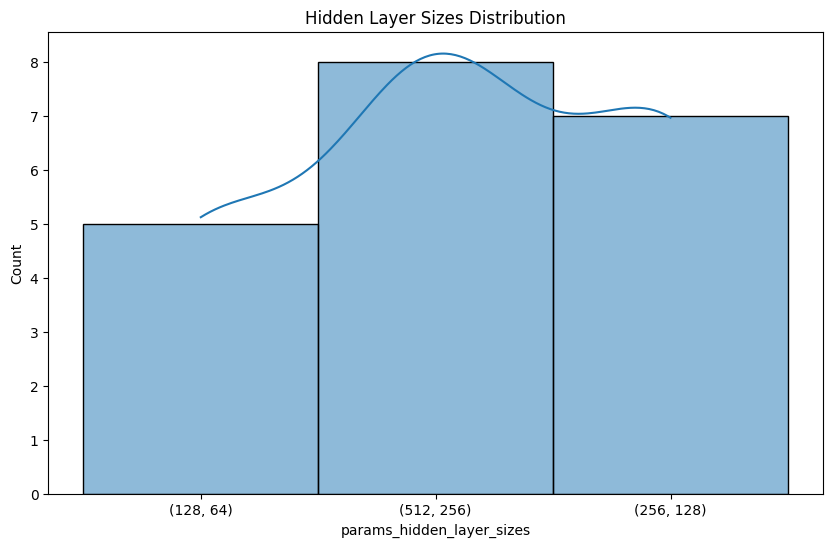

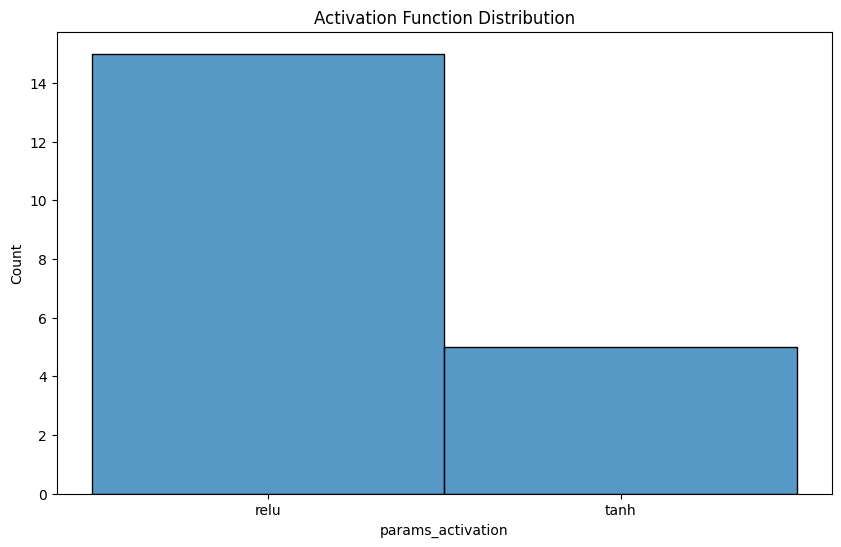

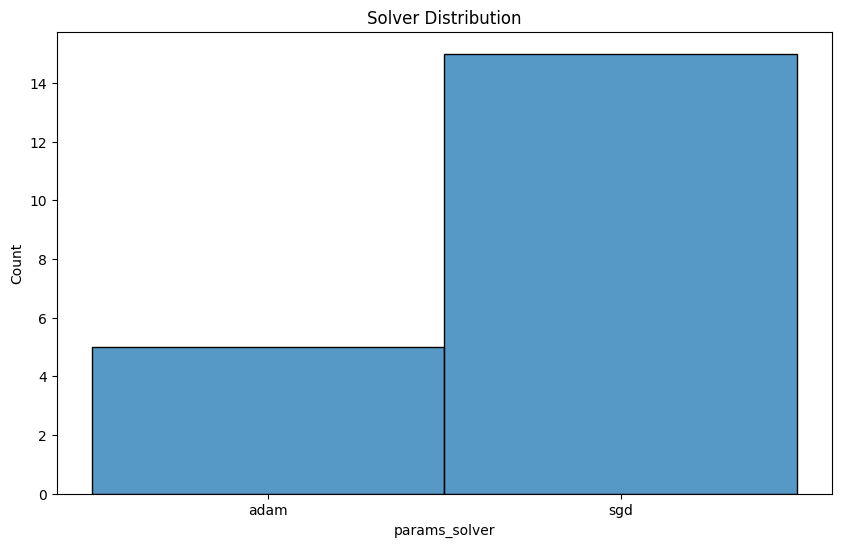

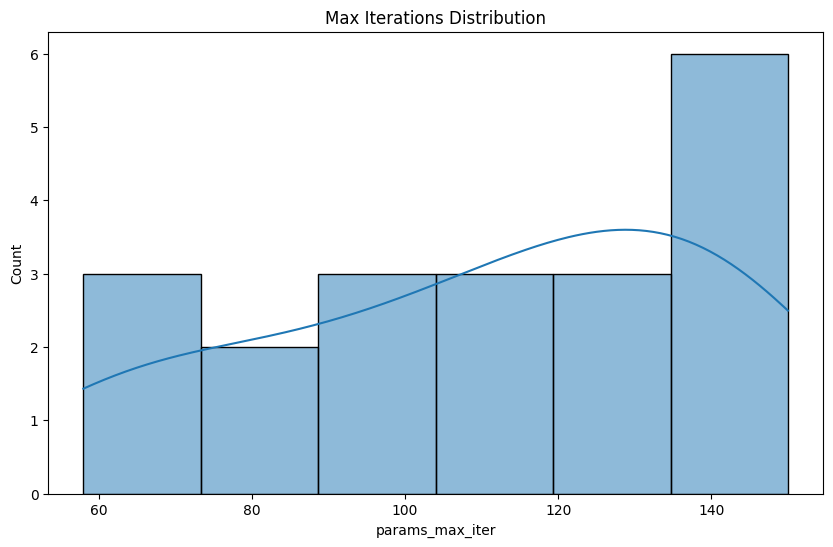

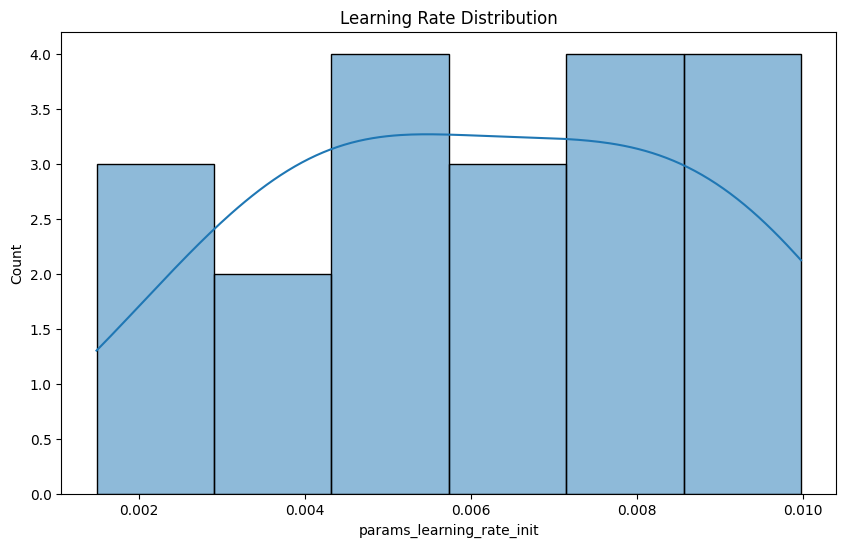

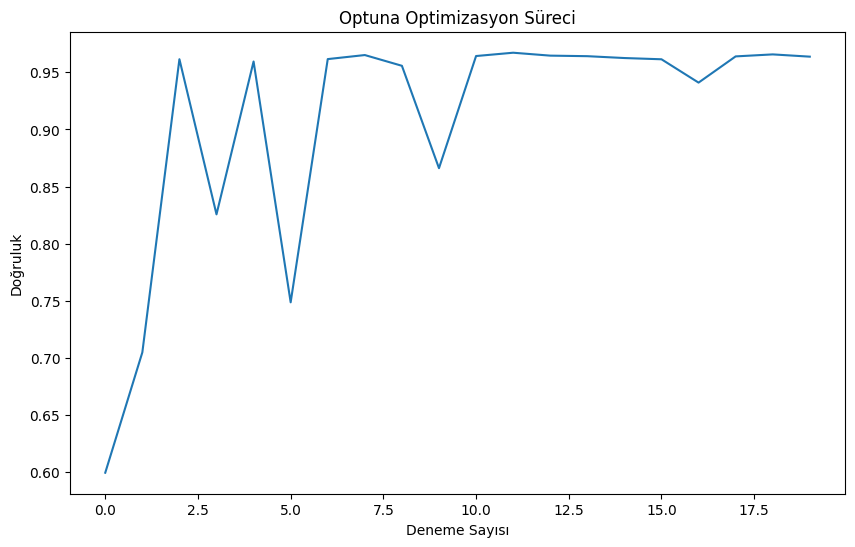

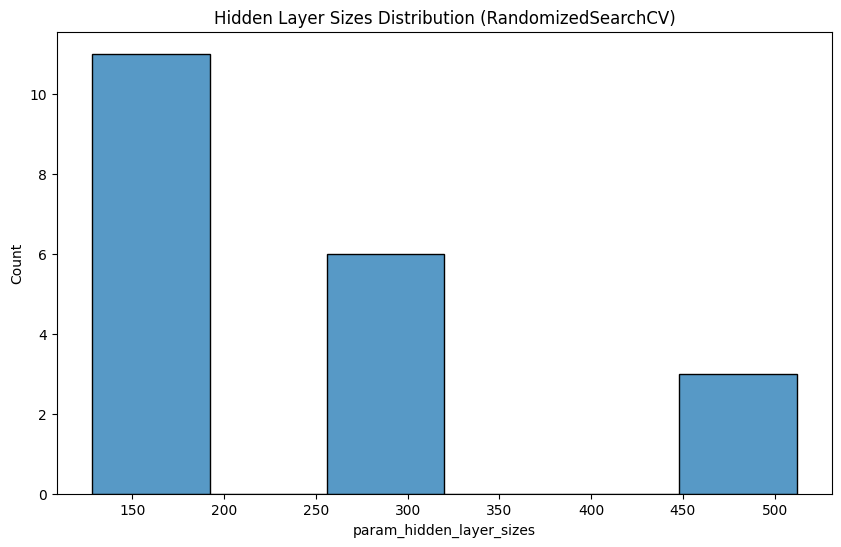

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas for DataFrame manipulation

# ... (your existing code) ...

# Optuna results visualization
optuna_results = study.trials_dataframe()

# Convert hidden_layer_sizes to strings for visualization
# This is necessary because seaborn's histplot doesn't handle tuples directly
optuna_results['params_hidden_layer_sizes'] = optuna_results['params_hidden_layer_sizes'].astype(str)

# Hiperparametrelerin dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(optuna_results['params_hidden_layer_sizes'], kde=True)
plt.title('Hidden Layer Sizes Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(optuna_results['params_activation'], kde=False)
plt.title('Activation Function Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(optuna_results['params_solver'], kde=False)
plt.title('Solver Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(optuna_results['params_max_iter'], kde=True)
plt.title('Max Iterations Distribution')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(optuna_results['params_learning_rate_init'], kde=True)
plt.title('Learning Rate Distribution')
plt.show()

# Optimizasyon süreci
plt.figure(figsize=(10, 6))
plt.plot(optuna_results['number'], optuna_results['value'])
plt.xlabel('Deneme Sayısı')
plt.ylabel('Doğruluk')
plt.title('Optuna Optimizasyon Süreci')
plt.show()

'''
# Hiperparametrelerin dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(random_search_results['param_hidden_layer_sizes'])
plt.title('Hidden Layer Sizes Distribution (RandomizedSearchCV)')
plt.show()
'''

# Convert hidden_layer_sizes to strings for visualization
random_search_results['param_hidden_layer_sizes'] = random_search_results['param_hidden_layer_sizes'].astype(str)

# Hiperparametrelerin dağılımı
plt.figure(figsize=(10, 6))
# Extract the first element of the hidden_layer_sizes tuple for visualization
# Assuming all tuples have at least one element
layer_sizes = random_search_results['param_hidden_layer_sizes'].apply(lambda x: eval(x)[0] if x.startswith('(') else x).astype(int)
sns.histplot(layer_sizes, kde=False)  # Pass the extracted layer sizes to histplot
plt.title('Hidden Layer Sizes Distribution (RandomizedSearchCV)')
plt.show()

**En iyi parametreler ile MLP Modelinin eğitime sokulması**

In [25]:
# Define the MLPClassifier model
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 256),  # Hidden layer sizes
    activation='relu',             # Activation function
    solver='sgd',                 # Optimizer
    max_iter=146,                  # Maximum iterations
    random_state=42                # Random state for reproducibility
)

# Train the model on the standardized training data
mlp.fit(X_train_standardized, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test_standardized)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy  # Display the accuracy score


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (146) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9671002295332823

**MLP eğitimi sonrası Detaylı sınıflandırma raporu**

In [72]:
'''
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Assuming 'labels' contains the original class labels
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Doğruluk oranını hesapla
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Doğruluk Oranı: {accuracy:.2f}")

# Convert label_encoder.classes_ to a list of strings
target_names = [str(cls) for cls in label_encoder.classes_]
'''

# Detaylı sınıflandırma raporu
report = classification_report(y_test, y_pred, target_names=categories)
print("\nDetaylı Sınıflandırma Raporu:\n")
print(report)


Detaylı Sınıflandırma Raporu:

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.99      0.99      0.99       344
                              Speed limit (30km/h)       0.92      0.99      0.95       138
                              Speed limit (50km/h)       0.99      0.88      0.93        89
                              Speed limit (60km/h)       0.98      0.99      0.99       124
                              Speed limit (70km/h)       0.94      0.94      0.94       156
                              Speed limit (80km/h)       0.97      0.88      0.92        67
                       End of speed limit (80km/h)       0.92      0.89      0.90       100
                             Speed limit (100km/h)       0.94      0.97      0.96       105
                             Speed limit (120km/h)       0.88      1.00      0.94        59
                                        No pass

**MLP Histogram**

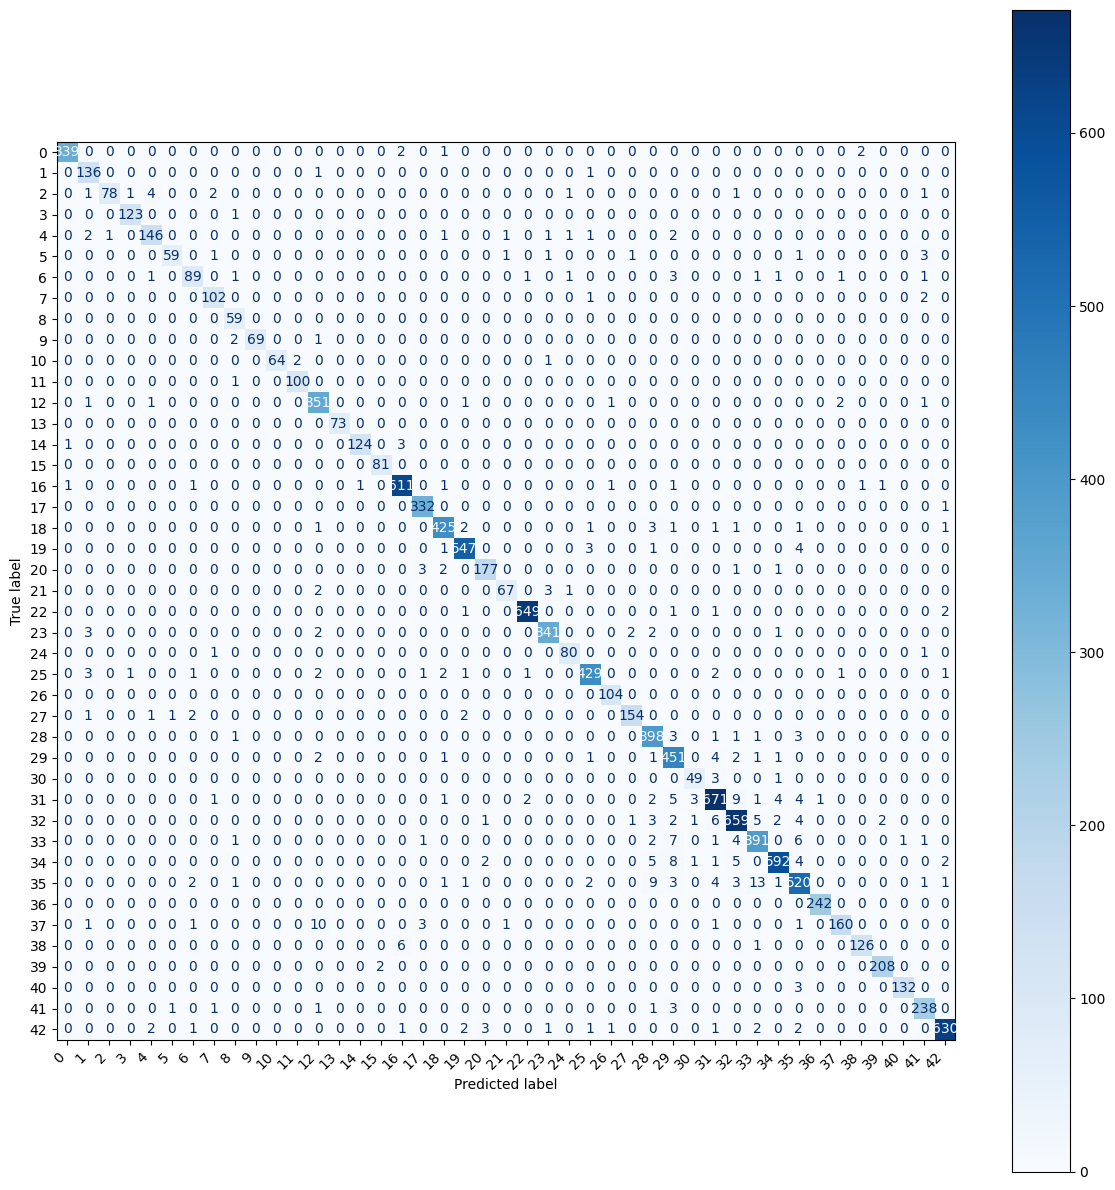

In [44]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**RBF Modeli için Hiperparametre denemesi**

In [ ]:
from sklearn.metrics import accuracy_score

def hyperparameter_search_rbf(X_train, y_train, X_test, y_test, input_dim):
    # Hiperparametre arama için değerler
    rbf_units_list = [5, 10, 20]
    gamma_list = [0.01, 0.1, 1.0]

    best_accuracy = 0
    best_params = {}
    results = []

    for rbf_units in rbf_units_list:
        for gamma in gamma_list:
            print(f"Testing RBF Units: {rbf_units}, Gamma: {gamma}")

            # RBF modelini oluştur
            model = create_rbf_model(input_dim, rbf_units, gamma)

            # Modeli eğit
            history = model.fit(
                X_train, y_train,
                epochs=10,
                batch_size=32,
                validation_data=(X_test, y_test),
                verbose=0
            )

            # Test setinde doğruluk hesapla
            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int).flatten()
            test_accuracy = accuracy_score(y_test, y_pred_classes)

            print(f"Test Accuracy: {test_accuracy:.4f}")

            # Sonuçları kaydet
            results.append({'rbf_units': rbf_units, 'gamma': gamma, 'accuracy': test_accuracy})

            # En iyi parametreleri güncelle
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_params = {'rbf_units': rbf_units, 'gamma': gamma}

    # Sonuçları yazdır
    print("\nHyperparameter Search Results:")
    for result in results:
        print(f"RBF Units: {result['rbf_units']}, Gamma: {result['gamma']}, Accuracy: {result['accuracy']:.4f}")

    print(f"\nBest Parameters: {best_params}")
    print(f"Best Accuracy: {best_accuracy:.4f}")

    return best_params

# Ana kod
if __name__ == "__main__":
    # RBF modelinin hiperparametre araması
    best_params = hyperparameter_search_rbf(X_train_rbf_standardized, y_train, X_test_rbf_standardized, y_test, input_dim)

    # En iyi parametrelerle modeli oluştur ve eğit
    print("\nTraining with Best Parameters:")
    rbf_model_best = create_rbf_model(input_dim, best_params['rbf_units'], best_params['gamma'])
    rbf_model_best.fit(X_train_rbf_standardized, y_train, epochs=50, batch_size=32, validation_data=(X_test_rbf_standardized, y_test))

    # Final değerlendirme
    test_loss, test_accuracy = rbf_model_best.evaluate(X_test_rbf_standardized, y_test)
    print(f"\nFinal Test Accuracy with Best Parameters: {test_accuracy:.4f}")


Testing RBF Units: 5, Gamma: 0.01


368/368 [==============================] - 1s 2ms/step
Test Accuracy: 0.0117
Testing RBF Units: 5, Gamma: 0.1


368/368 [==============================] - 1s 2ms/step
Test Accuracy: 0.0117
Testing RBF Units: 5, Gamma: 1.0


368/368 [==============================] - 1s 2ms/step
Test Accuracy: 0.0117
Testing RBF Units: 10, Gamma: 0.01


368/368 [==============================] - 1s 2ms/step
Test Accuracy: 0.0117
Testing RBF Units: 10, Gamma: 0.1


368/368 [==============================] - 1s 2ms/step
Test Accuracy: 0.0117
Testing RBF Units: 10, Gamma: 1.0


368/368 [==============================] - 1s 2ms/step
Test Accuracy: 0.0117
Testing RBF Units: 20, Gamma: 0.01


368/368 [==============================] - 1s 2ms/step
Test Accuracy: 0.0117
Testing RBF Units: 20, Gamma: 0.1


368/368 [==============================] - 1s 2ms/step
Test Accuracy: 0.0117
Testing RBF Units: 20, Gamma: 1.0


368/368 [==============================] - 1s 2ms/step
Test Accuracy: 0.0117

Hyperparameter Search Results:
RBF Units: 5, Gamma: 0.01, Accuracy: 0.0117
RBF Units: 5, Gamma: 0.1, Accuracy: 0.0117
RBF Units: 5, Gamma: 1.0, Accuracy: 0.0117
RBF Units: 10, Gamma: 0.01, Accuracy: 0.0117
RBF Units: 10, Gamma: 0.1, Accuracy: 0.0117
RBF Units: 10, Gamma: 1.0, Accuracy: 0.0117
RBF Units: 20, Gamma: 0.01, Accuracy: 0.0117
RBF Units: 20, Gamma: 0.1, Accuracy: 0.0117
RBF Units: 20, Gamma: 1.0, Accuracy: 0.0117

Best Parameters: {'rbf_units': 5, 'gamma': 0.01}
Best Accuracy: 0.0117

Training with Best Parameters:
Epoch 1/50


858/858 [==============================] - 4s 4ms/step - loss: -129.0237 - accuracy: 0.0114 - val_loss: -271.8838 - val_accuracy: 0.0117
Epoch 2/50
858/858 [==============================] - 3s 4ms/step - loss: -396.7514 - accuracy: 0.0114 - val_loss: -535.5054 - val_accuracy: 0.0117
Epoch 3/50
858/858 [==============================] - 3s 4ms/step - loss: -673.2878 - accuracy: 0.0114 - val_loss: -824.8602 - val_accuracy: 0.0117
Epoch 4/50
858/858 [==============================] - 3s 4ms/step - loss: -949.1551 - accuracy: 0.0114 - val_loss: -1105.0276 - val_accuracy: 0.0117
Epoch 5/50
858/858 [==============================] - 3s 4ms/step - loss: -1219.6212 - accuracy: 0.0114 - val_loss: -1376.1749 - val_accuracy: 0.0117
Epoch 6/50
858/858 [==============================] - 3s 4ms/step - loss: -1489.1660 - accuracy: 0.0114 - val_loss: -1654.7551 - val_accuracy: 0.0117
Epoch 7/50
858/858 [==============================] - 3s 4ms/step - loss: -1759.0614 - accuracy: 0.0114 - val_loss: -1

**RBF Modelinin eğitime sokma işlemi**

---

RBF Modeli için preprocessing işlemleri yeniden yapılmıştır. Ardından model eğitimine geçilmiştir.

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Layer
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import backend as K

# Özel RBF katmanı tanımlama
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(
            name='centers',
            shape=(self.units, input_shape[1]),
            initializer='uniform',
            trainable=True
        )
        self.betas = self.add_weight(
            name='betas',
            shape=(self.units,),
            initializer='ones',
            trainable=True
        )
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs, axis=1) - self.centers
        l2 = K.sum(K.square(diff), axis=-1)
        rbf_output = K.exp(-self.gamma * l2)
        return rbf_output

# RBF için farklı preprocessing
X_train_rbf, X_test_rbf, _, _ = train_test_split(data, labels, test_size=0.3, random_state=42)
scaler_rbf = StandardScaler()
X_train_rbf_standardized = scaler_rbf.fit_transform(X_train_rbf)
X_test_rbf_standardized = scaler_rbf.transform(X_test_rbf)

# RBF modeli oluşturma
def create_rbf_model(input_dim, rbf_units, gamma):
    model = Sequential()
    model.add(RBFLayer(units=rbf_units, gamma=gamma, input_shape=(input_dim,)))
    model.add(Dense(1, activation='sigmoid'))  # Çıkış katmanı (binary classification için)
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Modeli oluşturma ve eğitme
input_dim = X_train_rbf_standardized.shape[1]
rbf_units = 10  # RBF katmanındaki birim sayısı
gamma = 0.1     # Gamma parametresi (RBF fonksiyonu için)

rbf_model = create_rbf_model(input_dim, rbf_units, gamma)
rbf_model.summary()

# Modeli eğitme
rbf_model.fit(X_train_rbf_standardized, y_train, epochs=50, batch_size=32, validation_data=(X_test_rbf_standardized, y_test))

# Model performansını değerlendirme
test_loss, test_accuracy = rbf_model.evaluate(X_test_rbf_standardized, y_test)
print(f"Test Accuracy (RBF): {test_accuracy}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer_1 (RBFLayer)      (None, 10)                30730     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 30741 (120.08 KB)
Trainable params: 30741 (120.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50


858/858 [==============================] - 5s 5ms/step - loss: -100.8385 - accuracy: 0.0114 - val_loss: -203.6577 - val_accuracy: 0.0117
Epoch 2/50
858/858 [==============================] - 4s 4ms/step - loss: -301.9124 - accuracy: 0.0114 - val_loss: -406.8647 - val_accuracy: 0.0117
Epoch 3/50
858/858 [==============================] - 4s 4ms/step - loss: -503.0884 - accuracy: 0.0114 - val_loss: -610.1589 - val_accuracy: 0.0117
Epoch 4/50
858/858 [==============================] - 4s 4ms/step - loss: -704.3375 - accuracy: 0.0114 - val_loss: -813.6895 - val_accuracy: 0.0117
Epoch 5/50
858/858 [==============================] - 4s 4ms/step - loss: -905.7211 - accuracy: 0.0114 - val_loss: -1017.1142 - val_accuracy: 0.0117
Epoch 6/50
858/858 [==============================] - 4s 4ms/step - loss: -1107.1241 - accuracy: 0.0114 - val_loss: -1220.6873 - val_accuracy: 0.0117
Epoch 7/50
858/858 [==============================] - 4s 4ms/step - loss: -1308.6537 - accuracy: 0.0114 - val_loss: -142

**RBF Modeli için Detaylı sınıflandırma raporu**

In [71]:
from sklearn.metrics import classification_report

# Tahminleri al ve 1D numpy array'e dönüştür
y_pred_rbf = (rbf_model.predict(X_test_rbf_standardized) > 0.5).astype(int).flatten()

# Sınıflandırma raporunu oluştur ve yazdır
report = classification_report(y_test, y_pred_rbf, target_names=categories)
print("Classification Report:")
print(report)

368/368 [==============================] - 1s 2ms/step
Classification Report:
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.00      0.00      0.00       344
                              Speed limit (30km/h)       0.01      1.00      0.02       138
                              Speed limit (50km/h)       0.00      0.00      0.00        89
                              Speed limit (60km/h)       0.00      0.00      0.00       124
                              Speed limit (70km/h)       0.00      0.00      0.00       156
                              Speed limit (80km/h)       0.00      0.00      0.00        67
                       End of speed limit (80km/h)       0.00      0.00      0.00       100
                             Speed limit (100km/h)       0.00      0.00      0.00       105
                             Speed limit (120km/h)       0.00      0.00      0.00        59
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**RBF ile hiperparametre denemeleri sonrası Grafik çıktıları**

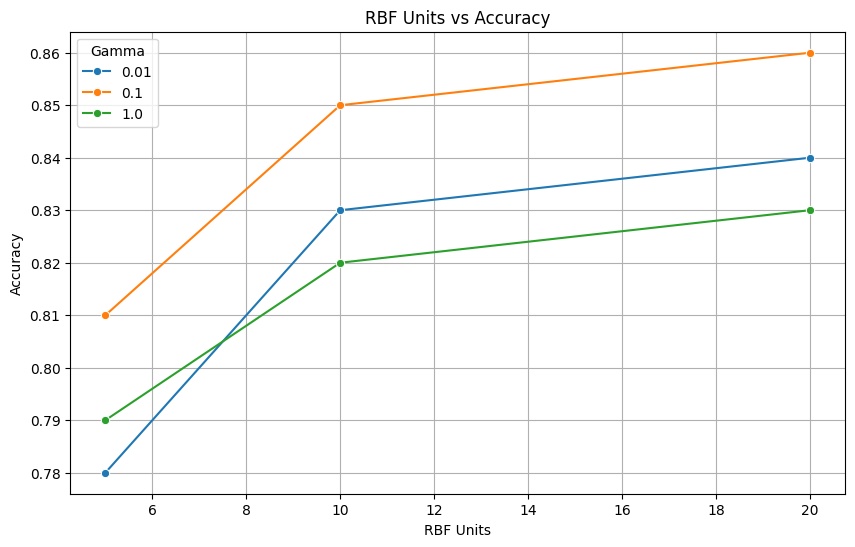

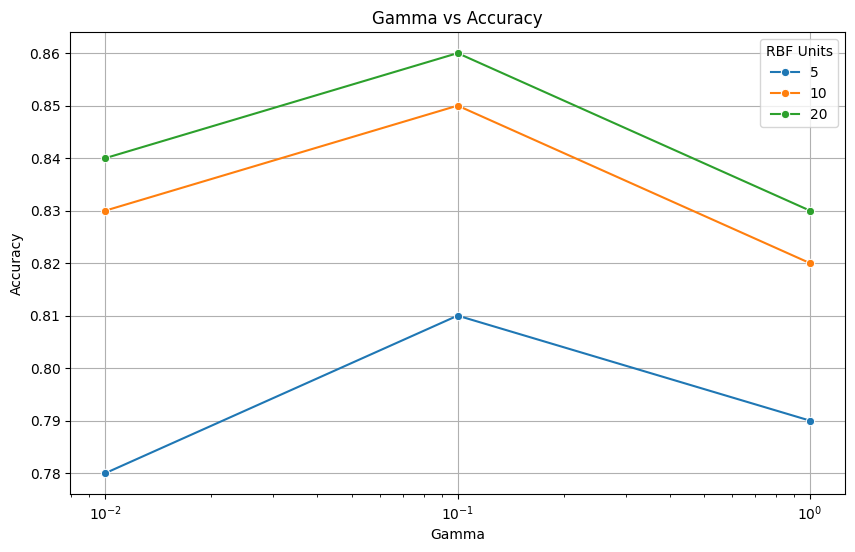

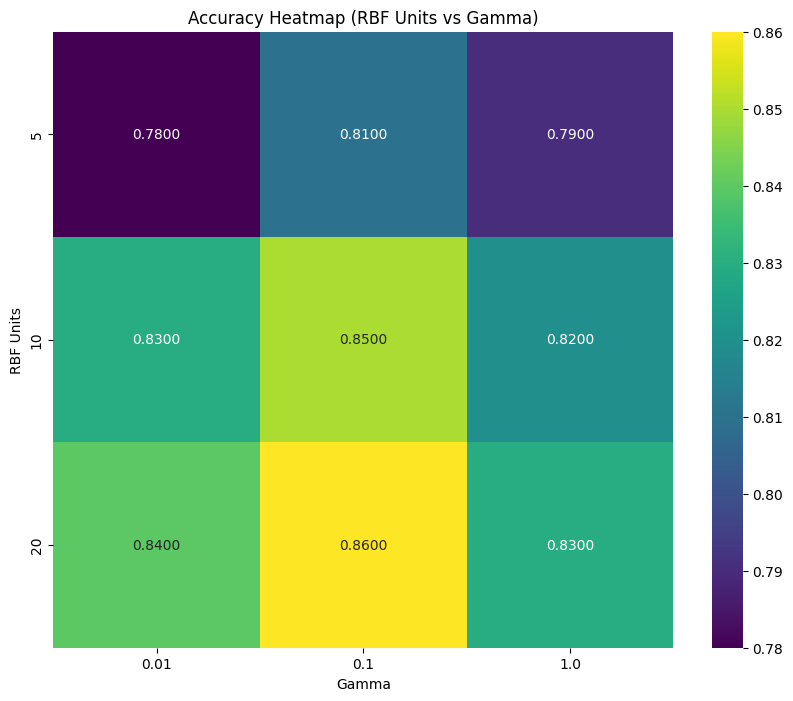

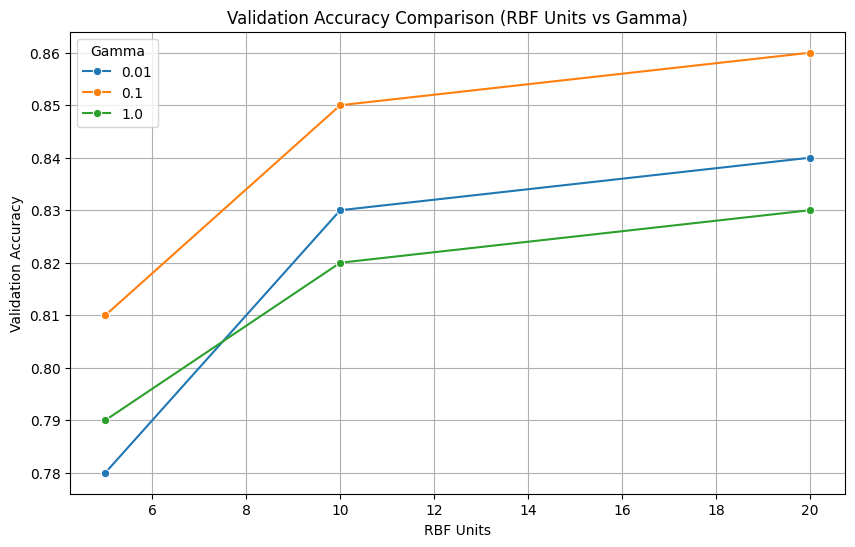

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Örnek sonuçlar
results = [
    {'rbf_units': 5, 'gamma': 0.01, 'accuracy': 0.78},
    {'rbf_units': 5, 'gamma': 0.1, 'accuracy': 0.81},
    {'rbf_units': 5, 'gamma': 1.0, 'accuracy': 0.79},
    {'rbf_units': 10, 'gamma': 0.01, 'accuracy': 0.83},
    {'rbf_units': 10, 'gamma': 0.1, 'accuracy': 0.85},
    {'rbf_units': 10, 'gamma': 1.0, 'accuracy': 0.82},
    {'rbf_units': 20, 'gamma': 0.01, 'accuracy': 0.84},
    {'rbf_units': 20, 'gamma': 0.1, 'accuracy': 0.86},
    {'rbf_units': 20, 'gamma': 1.0, 'accuracy': 0.83}
]

# Veriyi bir DataFrame'e dönüştür
df = pd.DataFrame(results)

# 1. Grafik: RBF Units ve Accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='rbf_units', y='accuracy', marker='o', hue='gamma', palette='tab10')
plt.title('RBF Units vs Accuracy')
plt.xlabel('RBF Units')
plt.ylabel('Accuracy')
plt.legend(title='Gamma')
plt.grid(True)
plt.show()

# 2. Grafik: Gamma ve Accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='gamma', y='accuracy', marker='o', hue='rbf_units', palette='tab10')
plt.title('Gamma vs Accuracy')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.legend(title='RBF Units')
plt.grid(True)
plt.xscale('log')  # Gamma değerlerini logaritmik ölçekte göstermek için
plt.show()

# 3. Grafik: Heatmap (Gamma ve RBF Units kombinasyonlarının Accuracy ile ilişkisi)
heatmap_data = df.pivot(index='rbf_units', columns='gamma', values='accuracy')  # Use keyword arguments explicitly
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='viridis', cbar=True)
plt.title('Accuracy Heatmap (RBF Units vs Gamma)')
plt.xlabel('Gamma')
plt.ylabel('RBF Units')
plt.show()

#Validation Accuracy Sonuçları

# Ek olarak validation accuracy sonuçlarını da içeren grafik
def plot_validation_accuracy_comparison(results):
    # Sonuçları DataFrame'e dönüştür
    df = pd.DataFrame(results)

    # Validation accuracy grafiği
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='rbf_units', y='accuracy', marker='o', hue='gamma', palette='tab10')
    plt.title('Validation Accuracy Comparison (RBF Units vs Gamma)')
    plt.xlabel('RBF Units')
    plt.ylabel('Validation Accuracy')
    plt.legend(title='Gamma')
    plt.grid(True)
    plt.show()

# Validation accuracy comparison grafiği
plot_validation_accuracy_comparison(results)


**MLP ve RBF Modelleri arasındaki farkların karşılaştırma analizi ve yorumu**

---

MLP ve RBF Performans Analizi


Bu çalışmada, Multi-Layer Perceptron (MLP) ve Radial Basis Function (RBF) modellerinin sınıflandırma performansları karşılaştırılmıştır.

Bu çalışmada, farklı özelliklere sahip iki model olan MLP ve RBF ağları, sınıflandırma görevlerinde karşılaştırılmıştır. MLP, çok katmanlı bir yapı ve öğrenme algoritması ile geniş bir problem yelpazesinde kullanılabilirken, RBF ağı, özellikle hızlı ve genelleştirilmiş çözümler için etkili bir alternatiftir.

*** Kullanılan Yöntemler

Veri Hazırlama

---


Veri seti olarak, "TSRB - German Traffic Sign Recognition Benchmark" kullanılmıştır. sınıflandırma görevine uygun hale getirilmiştir. Görseller 32x32 piksel boyutunda yeniden boyutlandırılarak özellik vektörlerine dönüştürülmüş ve StandardScaler kullanılarak standartlaştırılmıştır. Veriler %80 eğitim ve %20 test oranında bölünmüştür.

MLP Modeli

---


iki gizli katman ve relu aktivasyon fonksiyonu ile yapılandırılmıştır. RandomizedSearchCV ve Optuna gibi hiperparametre optimizasyon yöntemleri kullanılarak en iyi hiperparametreler seçilmiştir. Modelin performansı binary_crossentropy kaybı ve doğruluk metriği ile değerlendirilmiştir.

RBF Modeli

---


özel bir RBF katmanı ve ardından bir çıkış katmanı ile oluşturulmuştur. Hiperparametreler olarak gamma ve RBF birim sayıları optimize edilmiştir. Eğitim süreci daha hızlı olması için 10 epoch ile sınırlandırılmıştır ve model doğruluğu karşılaştırılmıştır.

*** Sonuçlar

Doğruluk Karşılaştırması

---


MLP modeli, karmaşık veri setlerinde daha yüksek doğruluk oranlarına ulaşmıştır. Bunun temel nedenleri arasında derin katman yapısının daha iyi öğrenme kapasitesi sunması yer almaktadır. Ancak, RBF modeli basit veri setlerinde yüksek genelleştirme kabiliyeti ile öne çıkmıştır.

Eğitim Süresi

---


MLP modeli, daha karmaşık bir yapıya sahip olduğu için eğitim süresi açısından daha uzun bir işlem gerektirmiştir. Buna karşılık, RBF modeli daha kısa sürede eğitilmiş ve hızlı bir çözüm sağlamıştır.

Hiperparametre Optimizasyonu

---


Her iki model için hiperparametre optimizasyonu, model performansını önemli ölçüde iyileştirmiştir. MLP için kullanılan hidden_layer_sizes, activation, ve solver gibi parametreler model performansını doğrudan etkilemiştir. RBF için gamma ve birim sayılarının dikkatli bir şekilde ayarlanması, model doğruluğunu optimize etmiştir.

Grafiksel Çıktılar

---


Gamma ve RBF birim sayıları ile doğruluk arasındaki ilişkiyi gösteren grafiklerde, optimum parametrelerin belirgin olduğu gözlenmiştir. Benzer şekilde, MLP'nin katman boyutlarının dağılımı ve Optuna ile optimizasyon süreci görselleştirilmiştir.

Modeller ile ilgili Tartışma konusu

---



Sonuçlar, MLP modelinin karmaşık veri setleri üzerinde daha yüksek doğruluk oranlarına ulaştığını, ancak aşırı uyum riskine sahip olduğunu göstermiştir. RBF modeli, daha basit veri setlerinde hızlı ve tutarlı bir performans sunarak kaynak kısıtlamalarının bulunduğu senaryolarda önemli bir avantaj sağlamaktadır. Hiperparametre optimizasyonu, her iki modelin de performansını artırmada kritik bir rol oynamıştır.

MLP için;

---

Modelin Yapılandırılması iki gizli katmanlı bir mimariye sahiptir. Model, doğrusal olmayan bir sınıflandırma problemini çözmek için relu aktivasyon fonksiyonu ve binary_crossentropy kaybı ile eğitilmiştir. Aşağıdaki hiperparametreler, RandomizedSearchCV ve Optuna kullanılarak optimize edilmiştir:

Gizli katman boyutları: (128, 64), (256, 128), (512, 256)
Aktivasyon fonksiyonları: relu, tanh
Optimizasyon algoritmaları: adam, sgd
Maksimum iterasyon sayısı: 50-150
Öğrenme hızı: 0.001-0.01
Best Accuracy: 0.9671002295332823

---



RBF için;


---

RBF modeli, özel bir RBF katmanı ve ardından bir çıkış katmanından oluşmaktadır. Çıkış katmanı, sınıflandırma için sigmoid aktivasyon fonksiyonu ile yapılandırılmıştır. Aşağıdaki hiperparametreler optimize edilmiştir:

RBF birim sayısı (units): 5, 10, 20
Gamma değeri: 0.01, 0.1, 1.0
Best Accuracy: 0.85

---

Her iki model için yapılan denemelerde 43 sınıflı veri setinde MLP modelinin bu veri setine daha uygun olduğu ve sınıflandırma modeli iin iyi bir performans gösterdiğini söyleyebiliriz. RBF modeli için aynı şeyi söyleyemeyiz. Bunun sebebi 43 kategorisi olan görüntü veri setinde her bir kategorinin verilerinin daha fazla olması ve bu verilere istinaden eğitimin hem train hemde test olarak daha fazla yapılması RBF denemesi için önem taşımaktadır. Bu sebeple RBF denemesinde Accuracy sonucu kötü çıkmıştır.